<a href="https://colab.research.google.com/github/Jinwuk/Fundamental_GitRepo/blob/master/stochastic_test2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stochastic Test 2019-01
====

새로운 실험을 하기로 했다.
아예 SDE 관련 라이브러리르 통쨰로 가져와서 테스트를 해보자
이것이 중요한 이유는 나중에 알고리즘을 개발한 후, 여기서 제공하는 결과와 맞추어 볼 수 있기 때문이다.

사이트는 다음과 같다.
업데이트 여부를 항상 확인하자.

https://pypi.org/project/sdeint/


In [2]:
!pip install sdeint

    100% |████████████████████████████████| 40kB 2.0MB/s 
  Running setup.py bdist_wheel for sdeint ... - \ done
  Stored in directory: /root/.cache/pip/wheels/6d/76/bf/cd470aaeb760f7ac85bca1614606ed5760408dbf5149240ba4
Successfully built sdeint


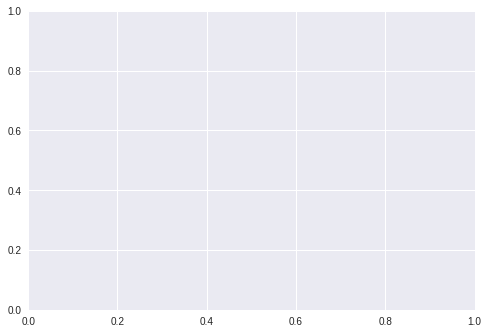

In [3]:
import numpy as np
import sdeint
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

다음은 함수관련 class로 보아야 할 것이다.  
하나 예외는 아래의 np.linspace 이다. 0.0 부터 5.0 까지 5001개를 포함한다. # 시작(포함), 끝 (포함), 갯수 
함수는 다음과 같다.
$$
\begin{aligned}
f(x) &= (a+b^2 x)(1-x^2) \\
g(x)&= b(a-x^2)dW_t
\end{aligned}
$$


In [0]:
x0 = 0.1
tspan = np.linspace(0.0, 5.0, 5001)

"""
a = 1.0
b = 0.8

def f(x, t):
    return -(a + x*b**2)*(1 - x**2)

def g(x, t):
    return b*(1 - x**2)
"""

def Fd(x):
  return 1/(1 + np.exp(-x))

def f(x, t):
  return 0.5 * Fd(x) * (1 - Fd(x))

def g(x, t):
  return Fd(x) * (1 - Fd(x))


sdeint.itoint(f, g, x0, tspan)  를 살펴보면 직관적이다.  이것은 다음을 의미한다. 
$$
dX_t = f(X_t, t)dt + g(X_t,t)dW_t
$$

In [0]:
result = sdeint.itoint(f, g, x0, tspan)

간단하게 결과를 보면 다음과 같다.

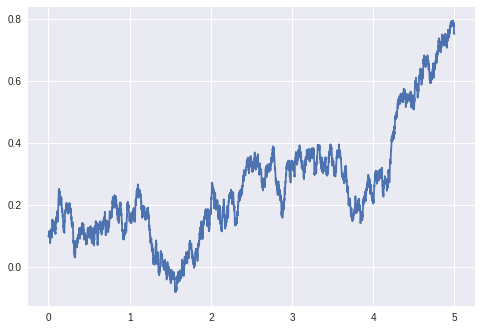

In [10]:
plt.plot(tspan, result)
plt.show()

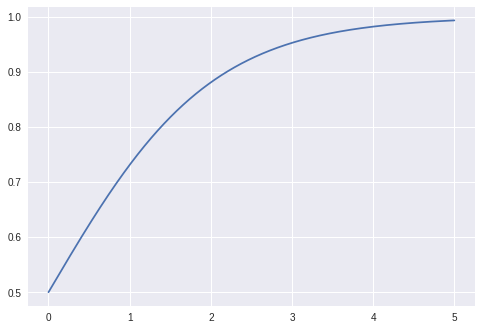

In [12]:
Orig = Fd(tspan)
plt.plot(tspan, Orig)
plt.show()